# Lesson 8 : Time Series Forecasting
*   **time series**: ordered sequence of values equally spaced, over time every yr, week.. etc
*   Single value at each time step --> **univariate**
    / Multiple values at each time step --> **multivariate**
    여러 value가 있더라도 어떤 값을 취해 사용할 지는 분석할 내용보고 판단!
*   Time series 도중에 missing, corrupted 값이 있는 구간 : **imputation**
*   **Seasonality** : pattern이 repeat될 때, predictable한 interval, peak 등이 존재할 때.
*   **White Noise** : 어떠한 pattern도 찾을 수 없을 떄. 이럴땐 probability distribution 분석, parameter 찾는 것이 최선.
원래 white noise라 하면, every frequency가 기본적으로 같은 amplitude를 가지고 있다는 의미..라는데 이해가 잘.. 근데 사실 noise는 실제로 보면, previous value의 영향을 받거나 correlated 되어있기도하고.. 그렇다.

# Common Patterns

In [ ]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)


*   **plot_series** : series를 보여주게 하는 함수. time 이라는 1-dimensional array를 포함하게 하는 것. series는 다른 1-dimensional array로, 각 time series에 상응하는 vaule를 나타내는 값.
*   Matplotlib에서는 plt.plot이 time series를 보여주는 함수.

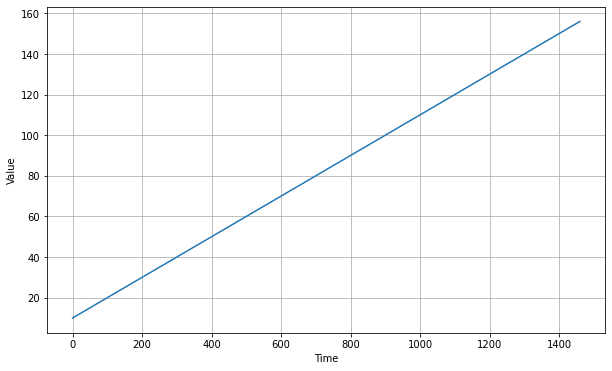

In [ ]:
time = np.arange(4 * 365 + 1)
baseline = 10
series = baseline + trend(time, 0.1)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()


*   range function을 사용해서 time-steps를 만들어보는 거다!
*   하루에 (0.1) 늘어가는것!



In [ ]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)


*   **phase** : how much the pattern is shifted relative to the absolute time
여기서는 phase가 0이지만, 있었다면 좌/우측으로 치우침이 있음.

In [ ]:
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level


*   step마다 one random number을 generate 한다는 것! --> rnd.randn(len(time))
*   **len()** : 리스트 안에 있는 원소의 개수, 리스트의 크기를 보여준다.
*   여기에 noise_level을 곱함으로써, noise의 amplitude가 얼마인지 보여준다.

# Forecasting
*   Naive forecasting: 가장 마지막 값을 두고, 그 다음 값도 같다고 두는 것 
*   모델을 deploy하기 전에 practice가 필요한데, test set에서 train을 절대 하지 않는 일반 ML모델에 비해 굉장히 다르다. 이유는 time series에서는 결국 가장 최근 모델이 미래를 예측하는 데 중요한 key이기 때문.
* Fixed Partitioning **OR** Roll-Forward Partitioning

-1) **Fixed Partitioning** - 먼저 데이터의 전반적인 패턴이 반영될 수 있도록 한 시즌을 일정하게 Training period에 담는 방식 (이번 레슨에선 이거)

2) Roll-Forward Partitioning - 짧은 훈련 기간에서부터 시작해서, 점차적으로 그 기간을 늘려나가는 방식. 하루/일주일/한달을 학습한 후 그 이후의 기간을 예측하는 방식